In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")

In [3]:
num_features = ["Age","Fare"]
cat_features = ["Pclass","Sex","SibSp","Parch","Embarked"]

In [4]:
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

In [5]:
preprocessor = ColumnTransformer(transformers=[
    ("num", num_transformer, num_features),
    ("cat", cat_transformer, cat_features)
])

In [6]:
X = df.drop(columns=["PassengerId","Name","Ticket","Cabin","Survived"])
y = df["Survived"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
depths = range(1, 21)
train_accuracies = []
val_accuracies = []

In [9]:
for depth in depths:
    # Create and train the model
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", DecisionTreeClassifier(max_depth=depth, random_state=42))
    ])

    pipeline.fit(X_train, y_train)

    # Predict on training and validation sets
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

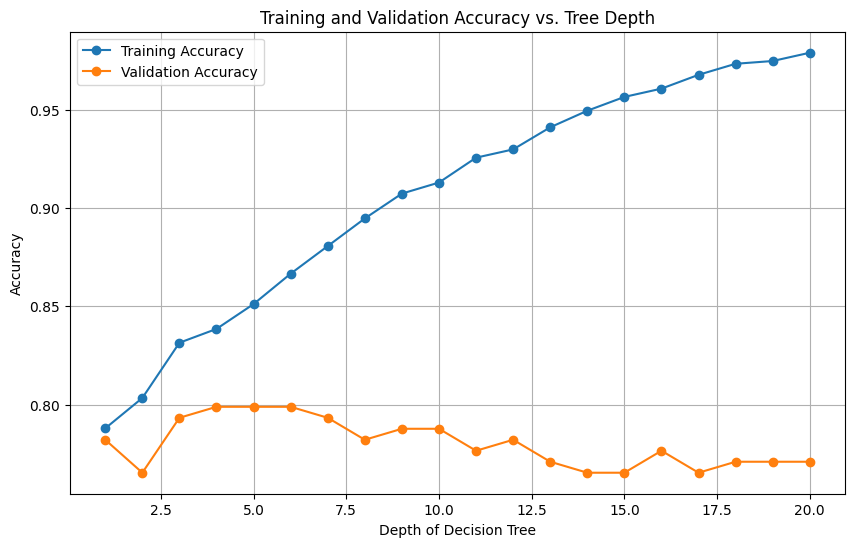

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(depths, val_accuracies, label='Validation Accuracy', marker='o')
plt.xlabel('Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs. Tree Depth')
plt.legend()
plt.grid()